In [1]:
# Import myfunc at cix folder
%matplotlib inline
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, '../cix')

import myfuncs as mf

import pandas as pd

from rdkit import rdBase
rdBase.DisableLog('rdApp.*') # To make rdkit silent

from rdkit.Chem import PandasTools as pt

from rdkit.Chem import Descriptors

/home/gcolmenarejo/anaconda3/envs/cix/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


The purpose of this script is to analyze the output of the CMD trained with a diverse set of 300K dissimilar ("orthogonal") compounds as created by the divsamp0 function and compare it with the output of the CMD trained with a random set of 300K compounds. As source of compounds, the set of ca. 5 million clean lead-like compounds from ZINC12 is used. From it, a collection of 300K orthogonal molecules were previously sampled by means of divsamp0 (see Exp4DivSamp script). 

The correctness, diversity and novelty of the output obtained with the orthogonal training set is compared with the output of the random training set. The correctness of the training and output files is assessed by the percentage of correct SMILES. The diversity of the training and output files are assessed by counting the number of clusters, frames and generic frames in both sets. The novelty of the training set is assessed by the percentage of molecules with a Tanimoto similarity < 0.7 to any molecule in the training set, and the percentage of frames or generic frames not present in the training set.

In an initial step, the orthogonality of the orthogonal set is checked. 

In [2]:
##########################################
## Check orthogonality of input smiles
##########################################



In [3]:
##########################################################
## Analysis of the unconditioned output - diverse set
##########################################################

it = range(300000, 300001)

df_un_d, cls_un_d = mf.wholean(it = it, name_train = "divtrain", name_pref = "divunc")

Clustering time: 00:06:15
Diversity analysis time: 00:14:24
Clustering time: 00:00:09
Diversity analysis time: 00:00:23
Arenas creation time: 00:04:46
Novelty analysis time: 00:15:24


In [4]:
# Show the results in the output dataframe

df_un_d

,# train,%corr inp,# clus inp,# fram inp,# gen fram inp,# out,%corr out,# clus out,# fram out,# gen fram out,% new str,% new fram,% new gen fram
1,300000.0,100.0,183477.0,121071.0,222038.0,10000.0,99.72,5942.0,4073.0,7227.0,13.62,100.0,45.03


In [5]:
# Save the results

df_un_d.to_csv("analysis1-div-un.csv")

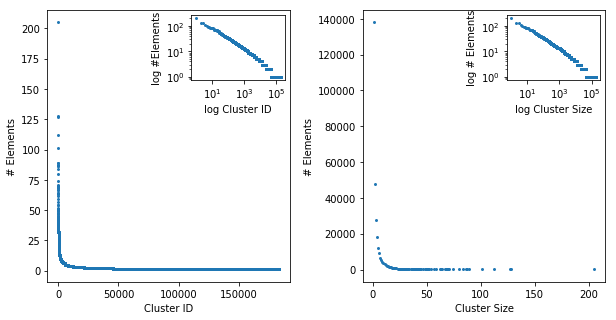

In [6]:
# Plot the clusters distributions and cluster size distribution
mf.plotmulticlus(cls_un_d, 10, 5)

In [7]:
##########################################################
## Analysis of the conditioned output - diverse set
##########################################################

df_co_d, cls_co_d = mf.wholean(it = it, name_train = "divtrain", name_pref = "divcon")

Clustering time: 00:05:21
Diversity analysis time: 00:12:03
Clustering time: 00:00:06
Diversity analysis time: 00:00:18
Arenas creation time: 00:04:49
Novelty analysis time: 00:14:56


In [8]:
# Show the results dataframe

df_co_d

,# train,%corr inp,# clus inp,# fram inp,# gen fram inp,# out,%corr out,# clus out,# fram out,# gen fram out,% new str,% new fram,% new gen fram
1,300000.0,100.0,183477.0,121071.0,222038.0,10000.0,99.76,3752.0,1902.0,3564.0,16.06,100.0,35.16


In [9]:
# Save the results dataframe

df_co_d.to_csv("analysis1-div-co.csv")

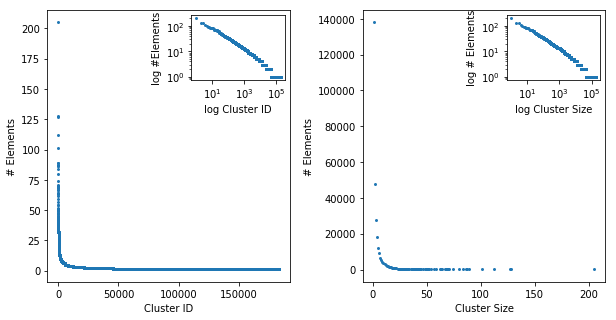

In [10]:
# Plot the clusters distributions and cluster size distribution

mf.plotmulticlus(cls_co_d, 10, 5)

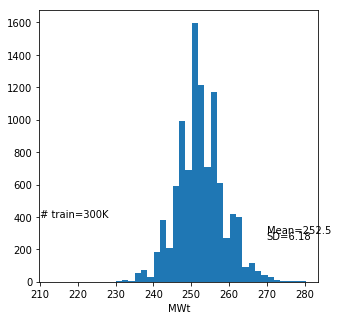

In [21]:
### Plot the bunch of histograms of mwt
it = range(300000, 300001)
mwts = []

for n in it:
    smis = mf.smif2smis('./divcon' + str(n) + '.smi')
    ncorr, n, smis, wrongsmis = mf.corrsmis(smis)
    smidf = mf.smis2smidf(smis)
    pt.AddMoleculeColumnToFrame(smidf,"smiles")
    smidf['mw'] = smidf['ROMol'].map(Descriptors.MolWt)
    del smidf["ROMol"]
    mwts.append(list(smidf['mw']))

leg = ["# train=300K"] 

mf.paintmultihist([mwts], "MWt", 1, 1, 270, 300, 5, 5, 210, 400, leg)

In [12]:
##########################################################
## Analysis of the unconditioned output - clustered set
##########################################################

it = range(300000, 300001)

df_un_c, cls_un_c = mf.wholean(it = it, name_train = "clutrain", name_pref = "cluunc")

Clustering time: 00:07:32
Diversity analysis time: 00:14:35
Clustering time: 00:00:10
Diversity analysis time: 00:00:24
Arenas creation time: 00:05:16
Novelty analysis time: 00:16:18


In [13]:
# Show the results in the output dataframe

df_un_c

,# train,%corr inp,# clus inp,# fram inp,# gen fram inp,# out,%corr out,# clus out,# fram out,# gen fram out,% new str,% new fram,% new gen fram
1,300000.0,100.0,1026.0,28958.0,109118.0,10000.0,99.47,1682.0,2906.0,7503.0,1.12,100.0,14.86


In [14]:
# Save the results

df_un_c.to_csv("analysis1-clu-un.csv")

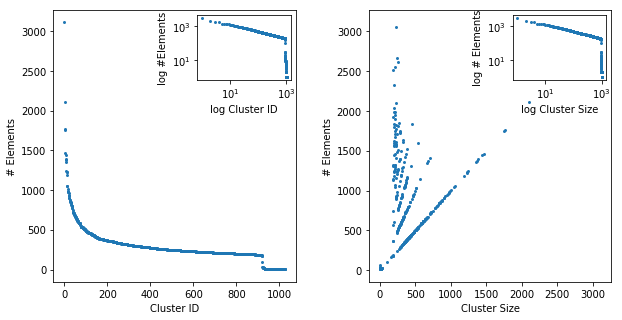

In [15]:
# Plot the clusters distributions and cluster size distribution
mf.plotmulticlus(cls_un_c, 10, 5)

In [16]:
##########################################################
## Analysis of the conditioned output - clustered set
##########################################################

df_co_c, cls_co_c = mf.wholean(it = it, name_train = "clutrain", name_pref = "clucon")

Clustering time: 00:06:14
Diversity analysis time: 00:13:18
Clustering time: 00:00:10
Diversity analysis time: 00:00:23
Arenas creation time: 00:05:21
Novelty analysis time: 00:16:57


In [17]:
# Show the results dataframe

df_co_c

,# train,%corr inp,# clus inp,# fram inp,# gen fram inp,# out,%corr out,# clus out,# fram out,# gen fram out,% new str,% new fram,% new gen fram
1,300000.0,100.0,1026.0,28958.0,109118.0,10000.0,99.32,1119.0,1121.0,3150.0,3.08,100.0,26.54


In [18]:
# Save the results dataframe

df_co_c.to_csv("analysis1-clu-co.csv")

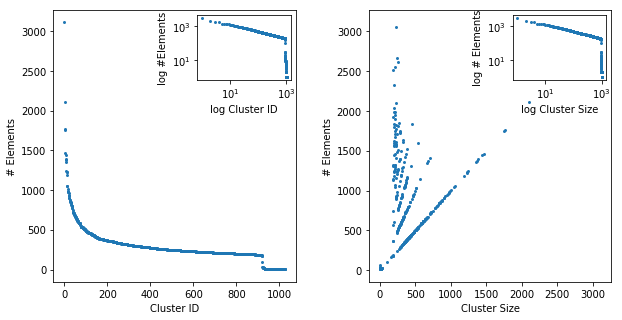

In [19]:
# Plot the clusters distributions and cluster size distribution

mf.plotmulticlus(cls_co_c, 10, 5)

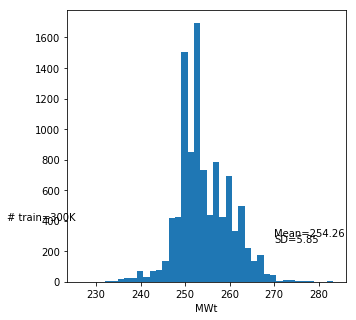

In [22]:
### Plot the bunch of histograms of mwt
it = range(300000, 300001)
mwts = []

for n in it:
    smis = mf.smif2smis('./clucon' + str(n) + '.smi')
    ncorr, n, smis, wrongsmis = mf.corrsmis(smis)
    smidf = mf.smis2smidf(smis)
    pt.AddMoleculeColumnToFrame(smidf,"smiles")
    smidf['mw'] = smidf['ROMol'].map(Descriptors.MolWt)
    del smidf["ROMol"]
    mwts.append(list(smidf['mw']))

leg = ["# train=300K"] 

mf.paintmultihist(mwts, "MWt", 1, 1, 270, 300, 5, 5, 210, 400, leg)